In [37]:
import matplotlib.pyplot as plt
import numpy as np
import PhysicsFunctions as phy

file = open('muon_lifetime_last.Spe', 'r+')

data = []

for line in file:
    if line[0] == " ":
        string = line
        string.strip()
        data.append(int(string))

file.close()

file = open('pulser_calibration.Spe', 'r+')

timing_data = []

for line in file:
    if line[0] == " ":
        string = line
        string.strip()
        timing_data.append(int(string))

file.close()

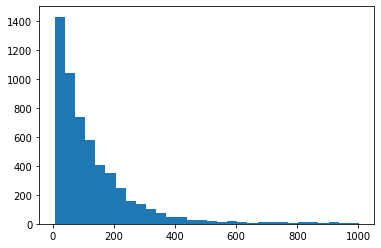

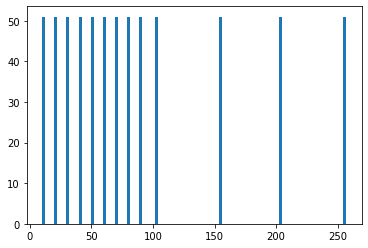

[10, 20, 30, 40, 50, 61, 71, 81, 91, 102, 154, 205, 257]


In [41]:
vals = range(1,len(data)+1)

x = []
unique_x = []

for i in range(len(data)):
    for j in range(data[i]):
        x.append(vals[i])
        if vals[i] in unique_x:
            pass
        else:
            unique_x.append(vals[i])
    
    
time_vals = range(1,len(timing_data)+1)

t = []
unique_t = []

for i in range(len(timing_data)):
    for j in range(timing_data[i]):
        if j>50 or range(timing_data[i]<100000):
            break
        t.append(time_vals[i])
        if time_vals[i] in unique_t:
            pass
        else:
            unique_t.append(time_vals[i])

y,binEdges,_ = plt.hist(x,30,visible=True)
plt.show()
yt, binEdgesT,_ = plt.hist(t,100,visible = True)
plt.show()

binCenters = (binEdges[1:]+binEdges[:-1])/2
ax = binCenters


binCenters = (binEdgesT[1:]+binEdgesT[:-1])/2
aT = binCenters
print(unique_t)



[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 13
    # variables        = 2
    chi-square         = 2.08904110
    reduced chi-square = 0.18991283
    Akaike info crit   = -19.7671746
    Bayesian info crit = -18.6372759
    R-squared          = 0.99996817
[[Variables]]
    slope:  10.3082192 +/- 0.01753441 (0.17%) (init = 1)
    b:     -1.03424658 +/- 0.19664289 (19.01%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, b) = -0.7888


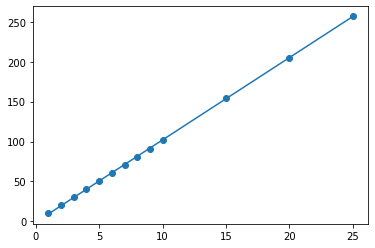

In [42]:
## TIME CALIBRATION

#Get fit to calibrate
actual_times = np.array([1,2,3,4,5,6,7,8,9,10,15,20,25]) #microseconds

plt.scatter(actual_times,unique_t)
output_t,result_t = phy.fitLinear(actual_times,unique_t)
plt.plot(actual_times,output_t)
plot_params = result_t.params.valuesdict()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 30
    # variables        = 2
    chi-square         = 4905.90064
    reduced chi-square = 175.210737
    Akaike info crit   = 156.909898
    Bayesian info crit = 159.712292
    R-squared          = 0.99855488
[[Variables]]
    amplitude:  1749.36490 +/- 16.9633770 (0.97%) (init = 779.4266)
    decay:      10.7503870 +/- 0.13722043 (1.28%) (init = 16.76666)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, decay) = -0.7613


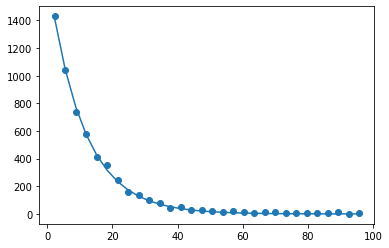

In [45]:
#Use resulting equation to appropriate modify x-values
measured_times = (ax-plot_params['b'])/plot_params['slope']
output,_ = phy.fitExponential(measured_times,y)


plt.plot(measured_times,output)

plt.scatter(measured_times,y)
